In [11]:

import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:


# Define parameters for loading dataset
image_size = (256, 256)  # Adjust this to match the input size expected by your model
batch_size = 32  # Adjust batch size as needed

# Load the complete dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   ( r"C:\Users\KIIT\Desktop\daa_project\New folder\BODYTYPE"),
    image_size=image_size,
    batch_size=batch_size
)

# Load the training dataset with a 20% validation split
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
   (r"C:\Users\KIIT\Desktop\daa_project\New folder\BODYTYPE"),
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

# Load the validation dataset with the same 20% validation split
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    (r"C:\Users\KIIT\Desktop\daa_project\New folder\BODYTYPE"),
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 77: invalid continuation byte

In [15]:
TRAIN_DIR = "./DATASET"
ORG_DIR = r"C:\Users\KIIT\Desktop\daa_project\New folder\BODYTYPE"
CLASS = ['apple', 'hourglass','rectangle', 'pear','inverted_triangle']


In [16]:

for C in CLASS:
    DEST = os.path.join(TRAIN_DIR, C)
    if not os.path.exists(DEST):
        os.makedirs(DEST)

    for img_path in glob.glob(os.path.join(ORG_DIR, C, "*")):
        SRC = img_path
        shutil.copy(SRC, DEST)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\KIIT\\Desktop\\daa_project\\New folder\\BODYTYPE\\apple\\Catherine_Zeta-Jones_Reveals_the_Advice_Michael_Douglas_Gave_Her_While_Prepping_for__Cocaine_Godmother____Photo_4016608___Catherine_Zeta_Jones_Photos___Just_Jared__Entertainment_News-removebg-preview.png'

In [ ]:
os.listdir("/content/DATASET")

['inverted_triangle', 'rectangle', 'hourglass', 'apple', 'pear']

MODEL BUILDING


In [ ]:
# Build the model
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Add new layers
X = Flatten()(base_model.output)
X = Dense(units=len(CLASS), activation='softmax')(X)  # Change to softmax for multi-class

# Final model
model = Model(base_model.input, X)

# Compile the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 127, 127, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,171,429 (84.58 MB)

 Trainable params: 368,645 (1.41 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Pre-process data using data generator

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Create the ImageDataGenerator
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=0.4,
    width_shift_range=0.3,
    horizontal_flip=True,
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    shear_range=0.4
)

train_data = train_datagen.flow_from_directory(directory="/content/DATASET",
                                               target_size=(256,256),
                                               batch_size=5)


Found 87 images belonging to 5 classes.


In [ ]:
import tensorflow_datasets as tfds

batch_size = 16

dataset_name= dataset
class_names= dataset.class_names
print(class_names)

['apple', 'hourglass', 'inverted triangle', 'pear', 'rectangle']


In [ ]:
#Enable debug mode
#tf.data.experimental.enable_debug_mode()

#Resize images
size=(512,512)
train_ds = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
val_ds = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))

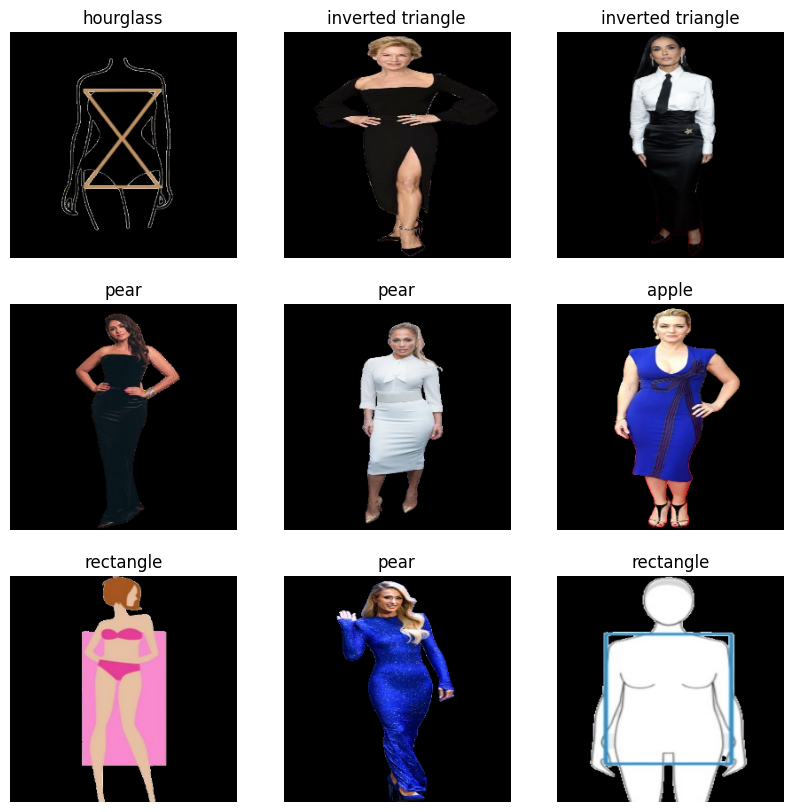

In [ ]:
#display the first 9 images

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    ax.set_axis_off()

In [ ]:
train_data.class_indices



{'apple': 0, 'hourglass': 1, 'inverted_triangle': 2, 'pear': 3, 'rectangle': 4}

In [ ]:
#Define image augmentation layers
image_aug= Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor =(-0.2,-0.3),interpolation='bilinear'),
    layers.RandomContrast(factor=0.1),
    layers.RandomTranslation(height_factor=0.1,width_factor=0.1),
],
                  name="image"
)

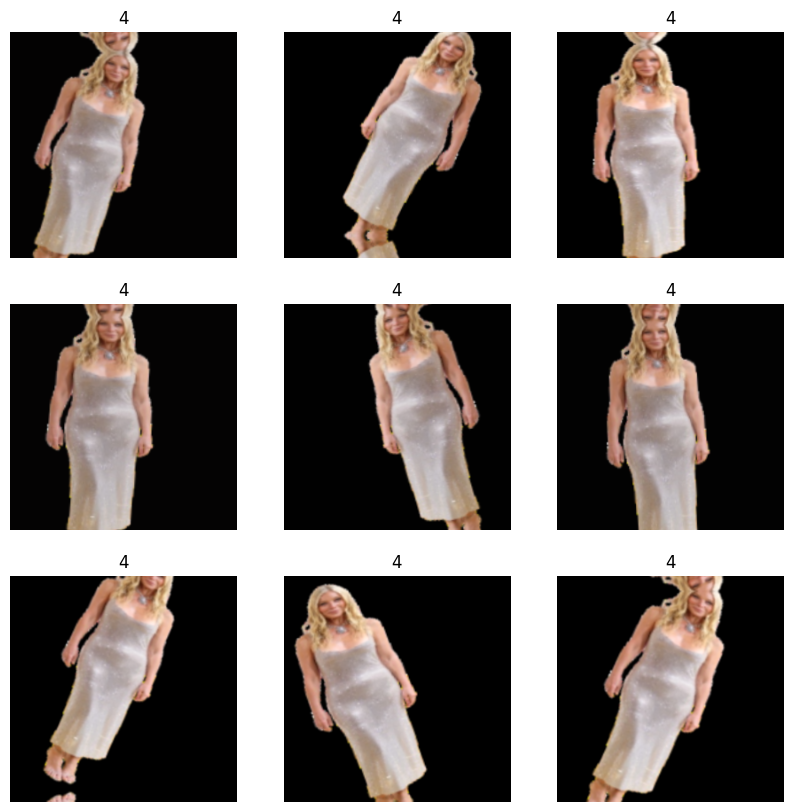

In [ ]:
# Augment and display images

for images, labels in ds_train.take(1):
  plt.figure(figsize=(10,10))
  first_image= images[0]
  def f(x):
    return int(x)
  f2= np.vectorize(f)
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    augmented_image= image_aug(
        tf.expand_dims(first_image,0),training=True
    )
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.title(f2(labels[0]))
    ax.set_axis_off()


visualizing the data

In [ ]:
t_img, label= next(train_data)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
def plotImages(img_arr, label):
  """
  input: image array
  output: plot images
  """
  for idx, img in enumerate(img_arr): # use img_arr, the function's input variable
    if idx <= 10:
      plt.figure(figsize=(3,7))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False # set plt.axis to False
      plt.show()


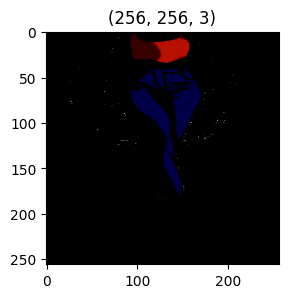

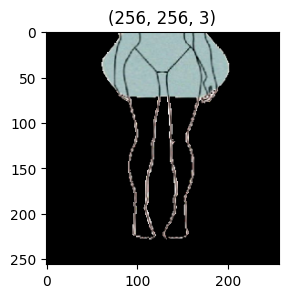

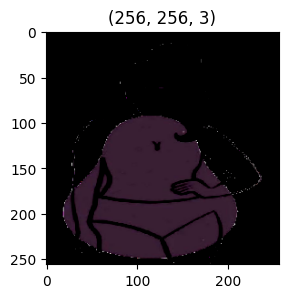

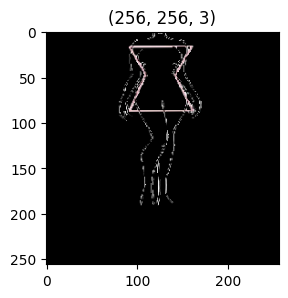

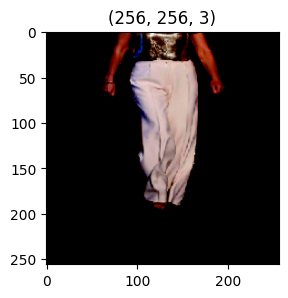

In [ ]:
 plotImages(t_img, label)

MODEL CHECKPOINT


In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc= ModelCheckpoint(filepath="./best_model.keras",monitor ="accuracy",
                    verbose=1,save_best_only= True)
es= EarlyStopping(monitor="accuracy",
                  min_delta=0.01,
                  patience=5,
                  verbose=1)

cb=[mc,es]

In [ ]:
his = model.fit(
    train_data,
    steps_per_epoch= 10 ,
    epochs=30,
    callbacks=cb
)
print(his.history)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2672 - loss: 7.8573
Epoch 1: accuracy improved from -inf to 0.26000, saving model to ./best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.2666 - loss: 8.3037
Epoch 2/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2030 - loss: 15.6216  
Epoch 2: accuracy improved from 0.26000 to 0.32432, saving model to ./best_model.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 809ms/step - accuracy: 0.2394 - loss: 15.2970
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4123 - loss: 11.2157
Epoch 3: accuracy improved from 0.32432 to 0.48000, saving model to ./best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.4184 - loss: 11.0949
Epoch 4/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4149 - loss: 8.4778
Epoch 4: accuracy improved from 0.48000 to 0.54054, saving model to ./best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.4526 - loss: 7.9954
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5888 - loss: 6.2942
Epoch 5: accuracy improved from 0.54054 to 0.56000, saving model to ./best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.5862 - loss: 6.4211
Epoch 6/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6305 - loss: 3.3708
Epoch 6: accuracy improved from 0.56000 to 0.59459, saving model to ./best_model.keras
10/10 ━━━

In [ ]:
from keras.models import load_model
model=load_model("/content/best_model.keras")

In [ ]:
h = his.history
h.keys()

print(list(h.keys()))

['accuracy', 'loss']


<ipython-input-26-29d1596b05ae>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'],'go--',c="red")


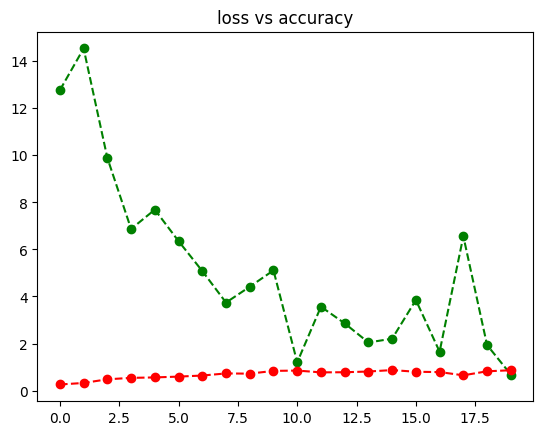

In [ ]:
plt.plot(h['loss'],'go--')
plt.plot(h['accuracy'],'go--',c="red")
plt.title("loss vs accuracy")
plt.show()

In [ ]:
# Assuming 'model' is your trained model
model.save('savedmodel.keras')

validate our model

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


0
apple


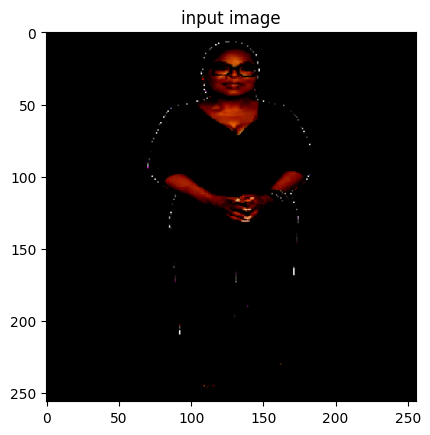

In [ ]:
path="/content/test.png"
img = load_img(path,target_size=(256,256))

i= img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(pred)
if pred==0:
    print("apple") # This line and subsequent lines within the if-else block need to be indented
elif pred==1:
    print("hourglass")
elif pred==2:
    print("rectangle")
elif pred==3:
    print("pear")
else:
    print("inverted_triangle")

#to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
import pickle
with open('my_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model has been saved as 'my_model.pkl'.")

Model has been saved as 'my_model.pkl'.
